In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Técnicas de dispersão
### Desvio padrão 

In [18]:
dataframe = pd.read_csv('../../data/jobs_in_data.csv')
dataframe.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


Vamos calcular o desvio padrão de cada coluna que contem dados numericos e avaliados 

In [19]:
for column in dataframe.columns:
    if dataframe[column].dtype != 'object':
        print(f'Standard deviation of {column} is {dataframe[column].std()}')


Standard deviation of work_year is 0.5194697748192417
Standard deviation of salary is 63608.83538733167
Standard deviation of salary_in_usd is 63177.372024435725


Usando numpy

In [20]:
for column in dataframe.columns:
    if dataframe[column].dtype != 'object':
        print(f'Standard deviation of {column} is {np.std(dataframe[column])}')

Standard deviation of work_year is 0.5194420097921063
Standard deviation of salary is 63605.43557250856
Standard deviation of salary_in_usd is 63173.995270804175


Vamos comparar agora o desvio padrão com a média para avalialo

In [21]:
for column in dataframe.columns:
    if dataframe[column].dtype != 'object':
        print(f'Standard deviation of {column} is {np.std(dataframe[column])} , mean is {dataframe[column].mean()}')

Standard deviation of work_year is 0.5194420097921063 , mean is 2022.7604489577766
Standard deviation of salary is 63605.43557250856 , mean is 149927.98129342598
Standard deviation of salary_in_usd is 63173.995270804175 , mean is 150299.4955638696


Podemos vendo isso temos o indicio de ter um alta variabilidade nos dados numericos
## Coeficiente de variação

In [22]:
for column in dataframe.columns:
    if dataframe[column].dtype != 'object':
        print(f'Coefficient of variation of {column} is {(np.std(dataframe[column])/dataframe[column].mean())*100}')

Coefficient of variation of work_year is 0.02567985794164345
Coefficient of variation of salary is 42.423992522133375
Coefficient of variation of salary_in_usd is 42.03207404908319


# IQR 

In [23]:
for column in dataframe.columns:
    if dataframe[column].dtype != 'object':
        print(f'{column}')
        print(f'Q1 is {dataframe[column].quantile(0.25)}')
        print(f'Q3 is {dataframe[column].quantile(0.75)}')
        print(f'IQR is {dataframe[column].quantile(0.75) - dataframe[column].quantile(0.25)}')

work_year
Q1 is 2023.0
Q3 is 2023.0
IQR is 0.0
salary
Q1 is 105200.0
Q3 is 187000.0
IQR is 81800.0
salary_in_usd
Q1 is 105700.0
Q3 is 186723.0
IQR is 81023.0


## Para facilitar o entendimento veja o boxplot

Text(0.5, 0, 'Salary')

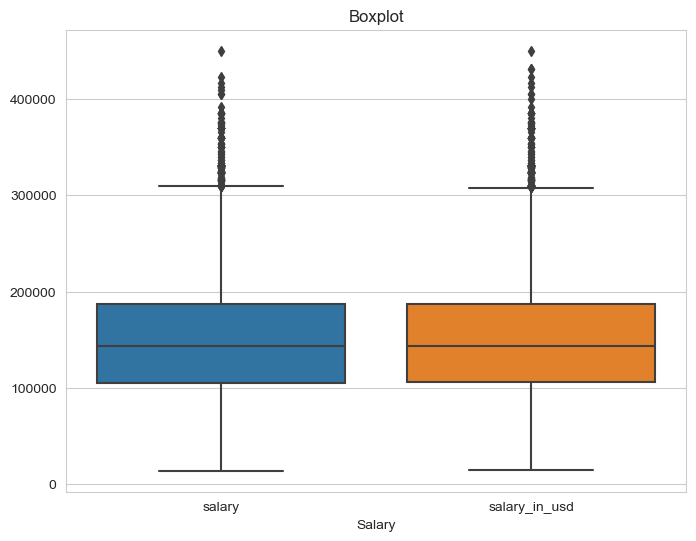

In [32]:
df_box = dataframe[['salary','salary_in_usd']]
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
sns.boxplot(data=df_box)
plt.title('Boxplot')
plt.xlabel('Salary')

No resultado acima podemos ver os quartis perfeitamente e os outliers, o que pode estar atrapalhando os nosso calculos de cv e de desvio padrão